# Distance of a ball from origin in a Plinko Board

This simulation will test to see the average distance of a ball from its origin when dropped randomly into a plinko board. The ball has inelastic collisions with the board, resulting in loss of Kinetic Energy with each collision. One thing to consider is that the walls do bound the results because it keeps it within the certain space, but the point of this is to test within what would be considered a normal plinko board one would see when a plinko board is used.

## Research Questions

1. Will the ball always fall within a certain range of distance from its origin?


2. What effect does the amount of kinetic energy lost have on the balls distance?


### The Physics

To have our ball fall through the plinko board, we have to make sure it doesn't break the laws of physics. Our ball has to feel the force of gravity as it falls. To accomplish this we use the equation $\vec{v_f}  = \vec{v_i} + \frac{\vec{Fnet}}{m}\ \times dt$ where $\vec{v_f}$ is the final velocity, $\vec{v_i}$ is the initial velocity, $\vec{Fnet}$ is the net force and m $m$ is the mass.
 
We set $\vec{Fnet} = <0, mass*g, 0>$, which sets the net force to be the force of gravity

When a collision happens, we find the velocity of the collision by finding the radial and tangential velocity

We find out new velocity after our collisions by doing $\vec{v} = \vec{v_\mathrm{tan}} + -\vec{v_\mathrm{rad}}$

We find the radial velocity with $\vec{v_\mathrm{rad}} = (\vec{v} \cdot rhat) \times rhat$ where rhat is the unit vector of the direction of the collision

We find the tangential velocity using $\vec{v_\mathrm{tan}} = \vec{v} - \vec{v_\mathrm{rad}}$

We account for kinetic energy loss by multiplying $\vec{v_\mathrm{rad}}$ by .5



### The simulation

The simulation is set up to create the plinko board, spawn our ball, run it through our board and then reset it to the top until we've run the ball through the board 100 times. 

In [2]:
from vpython import *
import random as rand
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
def make_rods():
    rods = []
    for i in range(-9,19):
        ev = i%2
        if ev == 0:
            for j in range(-14,15):
                if j%2 == 0:
                    rod = cylinder(pos=vector(j,i,-.5),axis=vector(0,0,1),radius=.1, collided = False)
                    rods.append(rod)
                
        elif ev != 0:
            for j in range(-14,15):
                if j%2 != 0:
                    rod = cylinder(pos=vector(j,i,-.5),axis=vector(0,0,1),radius=.1, collided = False)
                    rods.append(rod)
                    
    return rods

In [4]:
def check_collision(rods,ball):
    hits = []
    distance = []
    for i in range(len(rods)):
        rodcenter = rods[i].pos + rods[i].axis/2
        dist = ball.pos-rodcenter
        R = ball.radius+rods[i].radius
        if mag(dist) < R and rods[i].collided == False:
            hits.append(i)
            distance.append(dist)
            rods[i].collided = True
            
        elif mag(dist) > R and rods[i].collided == True:
            rods[i].collided = False
            
      
    return hits, distance    

In [12]:
scene = canvas(title="Plinko Board")
scene.center = vector(0,5,0)

Lwall = box(pos = vec(-15, 4, 0), size = vec(1, 30, 1), color=color.white)
Rwall = box(pos = vec(15, 4, 0), size = vec(1, 30, 1), color=color.white)
Bwall = box(pos = vec(0, -10, 0), size = vec(30, 1, 1), color=color.white)

rods = []
rods = make_rods()

ball = sphere(pos = vec(rand.uniform(-14,14),20,0), radius = .4, color = color.cyan)

ball.p = vec(0,0,0)
ball.m = .001
ball.v = vec(0,0,0)

#Constants
g = -9.8
Fnet = vec(0,ball.m*g,0)
t = 0
dt = .001

#
displace = []
balls = []
count = 0
origin = ball.pos.x
scene.pause()
while count < 50:
    rate(50000)
    hits, R = check_collision(rods,ball) 
    ball.v = ball.v + Fnet/ball.m*dt 
    ball.pos = ball.pos + ball.v*dt
    
    if ball.pos.x > 14.25:
            ball.v.x = -abs(ball.v.x)
    elif ball.pos.x < -14.25:
            ball.v.x = abs(ball.v.x)

    
    if len(hits) == 1:
        r = R[0]
        r.z = 0
        rhat = hat(r)
        vballrad = dot(ball.v,rhat)*rhat #rad comp of ball.v
        vballtan = ball.v - vballrad #tan comp of ball.v
        vballrad = - vballrad * .5 #reverse ball.rad due to collision
        ball.v = vballtan + vballrad #new ball.v after collision
        
    if ball.pos.y < -9:
        dis = abs(origin - ball.pos.x)
        displace.append(dis)
        ball.pos = vec(rand.uniform(-14,14), 20, 0)
        origin = ball.pos.x
        ball.v = vec(0,0,0)
        count += 1
        balls.append(count)

<IPython.core.display.Javascript object>

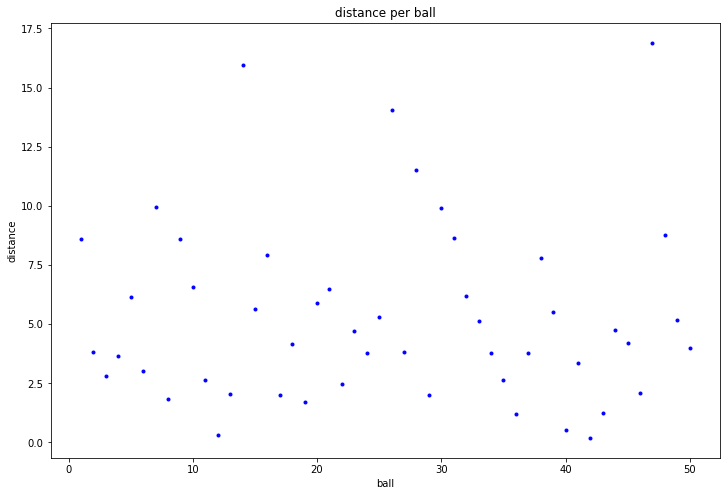

In [13]:
plt.figure(figsize=(12,8))
plt.title('distance per ball')
plt.plot(balls,displace,'b.')
plt.xlabel("ball")
plt.ylabel("distance")
plt.show()

### Distance

As we can see from the graph above, there seems to be a random distribution of distances after running a ball through the Plink Board 50 times. From this I would make the assumption no matter how many times we run the simulation we would not see any type of common distance from it's origin.

### Kinetic Energy Loss

In the code segment below we will run the simulation again for the same amount of time, but we will instead multiply $v_\mathrm{rad}$ by .7 to see how it affects the displacement from the origin.

In [15]:
scene = canvas(title="Plinko Board")
scene.center = vector(0,5,0)

Lwall = box(pos = vec(-15, 4, 0), size = vec(1, 30, 1), color=color.white)
Rwall = box(pos = vec(15, 4, 0), size = vec(1, 30, 1), color=color.white)
Bwall = box(pos = vec(0, -10, 0), size = vec(30, 1, 1), color=color.white)

rods = []
rods = make_rods()

ball = sphere(pos = vec(rand.uniform(-14,14),20,0), radius = .4, color = color.cyan)

ball.p = vec(0,0,0)
ball.m = .001
ball.v = vec(0,0,0)

#Constants
g = -9.8
Fnet = vec(0,ball.m*g,0)
t = 0
dt = .001

#
displace = []
balls = []
count = 0
origin = ball.pos.x
scene.pause()
while count < 50:
    rate(50000)
    hits, R = check_collision(rods,ball) 
    ball.v = ball.v + Fnet/ball.m*dt 
    ball.pos = ball.pos + ball.v*dt
    
    if ball.pos.x > 14.25:
            ball.v.x = -abs(ball.v.x)
    elif ball.pos.x < -14.25:
            ball.v.x = abs(ball.v.x)

    
    if len(hits) == 1:
        r = R[0]
        r.z = 0
        rhat = hat(r)
        vballrad = dot(ball.v,rhat)*rhat #rad comp of ball.v
        vballtan = ball.v - vballrad #tan comp of ball.v
        vballrad = - vballrad * .7 #reverse ball.rad due to collision
        ball.v = vballtan + vballrad #new ball.v after collision
        
    if ball.pos.y < -9:
        dis = abs(origin - ball.pos.x)
        displace.append(dis)
        ball.pos = vec(rand.uniform(-14,14), 20, 0)
        origin = ball.pos.x
        ball.v = vec(0,0,0)
        count += 1
        balls.append(count)
        


<IPython.core.display.Javascript object>

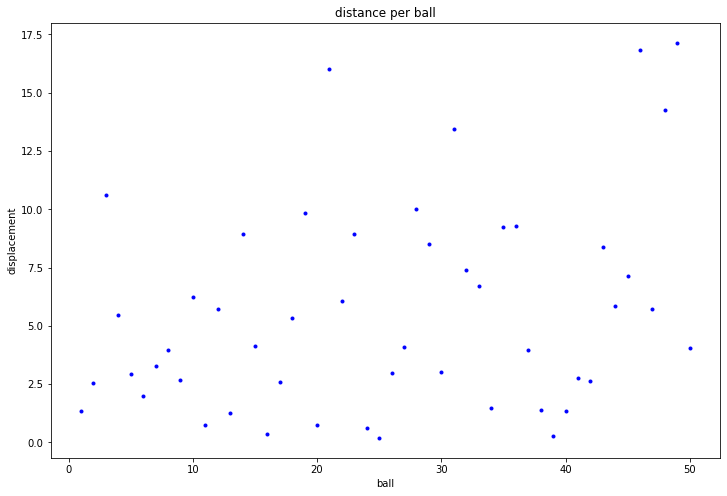

In [16]:
plt.figure(figsize=(12,8))
plt.title('distance per ball')
plt.plot(balls,displace,'b.')
plt.xlabel("ball")
plt.ylabel("displacement")
plt.show()

If we compare our findings the the original graph, we an even larger range of distances. So with a lower loss of kinetic energy, the ball has greater displacement from the origin through the 50 simulations.

## Conclusion

After running the experiment, I can answer each of my research questions. First, we found that there is no common range of distances on our ball when ran through our simulation. There is a random dispersion in our graph which shows it is not predictable how far the ball will be from its origin. Using our baseline test, we then compared it to the same simulation using a lower factor of kinetic energy lost.